In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lmplot

### Let's read the data

In [2]:
df = pd.read_csv("./data/diamonds_train.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [4]:
df.sample(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
25534,0.62,Good,D,SI2,64.0,56.0,1410,5.42,5.39,3.46
1045,0.33,Ideal,G,VS2,62.3,55.0,579,4.42,4.47,2.77
27661,1.13,Ideal,D,VVS2,62.3,54.0,12788,6.64,6.70,4.16
40008,0.91,Very Good,F,SI2,60.9,58.0,4054,6.28,6.20,3.80
35768,1.51,Premium,H,VS2,60.2,60.0,11540,7.35,7.33,4.42
30480,0.33,Very Good,F,VS1,62.7,59.0,741,4.35,4.39,2.74
1495,1.03,Very Good,G,I1,62.4,57.0,3060,6.41,6.45,4.01
14189,1.31,Good,H,SI1,57.9,62.0,6857,7.18,7.25,4.18
34862,0.90,Very Good,E,VS2,61.1,63.0,4062,6.20,6.17,3.78
3940,0.33,Ideal,E,VVS1,61.8,57.0,1052,4.43,4.40,2.73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797706,0.475544,0.2,0.40,0.70,1.040,4.50
depth,40455.0,61.752841,1.431725,43.0,61.00,61.80,62.500,79.00
table,40455.0,57.446133,2.233535,43.0,56.00,57.00,59.000,95.00
price,40455.0,3928.444469,3992.416147,326.0,945.00,2397.00,5331.000,18823.00
x,40455.0,5.729392,1.124453,0.0,4.71,5.69,6.540,10.23
y,40455.0,5.732819,1.146650,0.0,4.72,5.71,6.540,58.90
z,40455.0,3.537154,0.697062,0.0,2.91,3.52,4.035,8.06


In [7]:
df.describe(include="object").T

,count,unique,top,freq
cut,40455,5,Ideal,16220
color,40455,7,G,8455
clarity,40455,8,SI1,9749


In [8]:
df.max()

carat            4.5
cut        Very Good
color              J
clarity         VVS2
depth             79
table             95
price          18823
x              10.23
y               58.9
z               8.06
dtype: object

In [9]:
df.min()

carat       0.2
cut        Fair
color         D
clarity      I1
depth        43
table        43
price       326
x             0
y             0
z             0
dtype: object

In [10]:
df.mean()

carat       0.797706
depth      61.752841
table      57.446133
price    3928.444469
x           5.729392
y           5.732819
z           3.537154
dtype: float64

In [11]:
df.median()

carat       0.70
depth      61.80
table      57.00
price    2397.00
x           5.69
y           5.71
z           3.52
dtype: float64

In [12]:
df.std()

carat       0.475544
depth       1.431725
table       2.233535
price    3992.416147
x           1.124453
y           1.146650
z           0.697062
dtype: float64

In [13]:
df.quantile(0.25)

carat      0.40
depth     61.00
table     56.00
price    945.00
x          4.71
y          4.72
z          2.91
Name: 0.25, dtype: float64

In [14]:
df.quantile(0.75)

carat       1.040
depth      62.500
table      59.000
price    5331.000
x           6.540
y           6.540
z           4.035
Name: 0.75, dtype: float64

<AxesSubplot:>

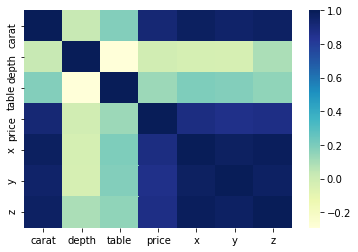

In [15]:
corr = df.corr()
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [16]:
"""I decided not to work with columns x, y and z because they were strongly correlated with carat. 
#When two independent variables are strongly correlated, they have a tendency to cancel each other and provide the model with little information."""

'I decided not to work with columns x, y and z because they were strongly correlated with carat. \n#When two independent variables are strongly correlated, they have a tendency to cancel each other and provide the model with little information.'

In [17]:
diamonds = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',]]
diamonds.to_csv('./data/diamonds_data.csv', index = False)

In [18]:
df = pd.read_csv("./data/diamonds_data.csv")

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.21,Premium,J,VS2,62.4,58.0,4268
1,0.32,Very Good,H,VS2,63.0,57.0,505
2,0.71,Fair,G,VS1,65.5,55.0,2686
3,0.41,Good,D,SI1,63.8,56.0,738
4,1.02,Ideal,G,SI1,60.5,59.0,4882


<AxesSubplot:>

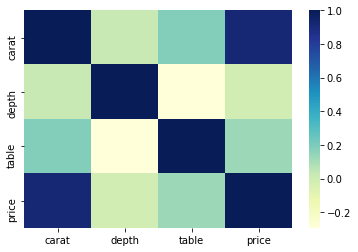

In [20]:
corr = df.corr()
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [21]:
plt.style.use("ggplot")

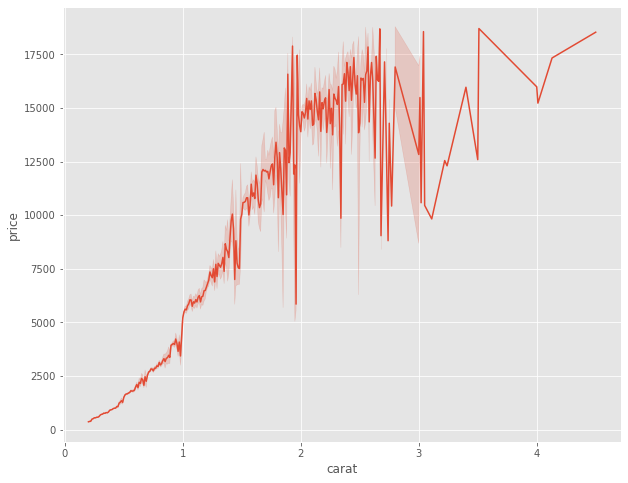

In [22]:
fig = plt.figure(figsize=(10,8))
ax = sns.lineplot(x="carat", y="price", data=df)

In [23]:
df.pivot_table(index=['cut'], aggfunc='mean')

,carat,depth,price,table
cut,,,,
Fair,1.047305,64.051438,4333.271980,59.022104
Good,0.844565,62.407699,3880.611794,58.652307
Ideal,0.700337,61.703206,3436.112577,55.952990
Premium,0.896125,61.261082,4617.322612,58.737076
Very Good,0.808056,61.824794,3994.444420,57.956031


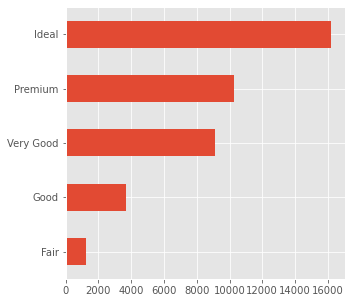

In [24]:
df["cut"].value_counts().sort_values().plot(kind="barh", figsize=(5,5));

In [25]:
df.pivot_table(index=['color'], aggfunc='mean')

,carat,depth,price,table
color,,,,
D,0.653036,61.721886,3134.943157,57.344959
E,0.658835,61.659836,3088.342526,57.494567
F,0.731503,61.689954,3677.355720,57.409726
G,0.774382,61.752785,4023.214902,57.287889
H,0.910355,61.827481,4476.469014,57.533503
I,1.026791,61.873214,5090.868800,57.562574
J,1.166500,61.909626,5346.234112,57.790701


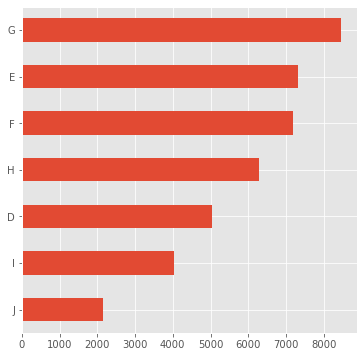

In [26]:
df["color"].value_counts().sort_values().plot(kind="barh", figsize=(6,6));

In [27]:
df.pivot_table(index=['clarity'], aggfunc='mean')

,carat,depth,price,table
clarity,,,,
I1,1.299591,62.804796,3971.206039,58.237478
IF,0.499849,61.511454,2797.897513,56.496684
SI1,0.851174,61.859668,3999.856908,57.648549
SI2,1.081472,61.779954,5101.044307,57.909150
VS1,0.721553,61.678948,3796.813551,57.285410
VS2,0.762661,61.721345,3913.590182,57.404520
VVS1,0.506994,61.606921,2559.498558,56.929740
VVS2,0.591777,61.658884,3240.978942,57.031561


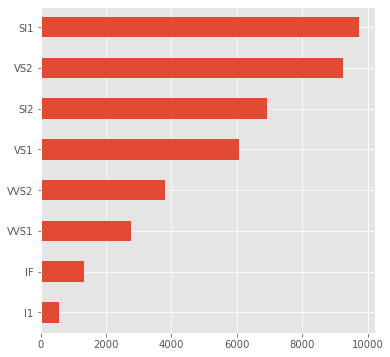

In [28]:
df["clarity"].value_counts().sort_values().plot(kind="barh", figsize=(6,6));


<AxesSubplot:>

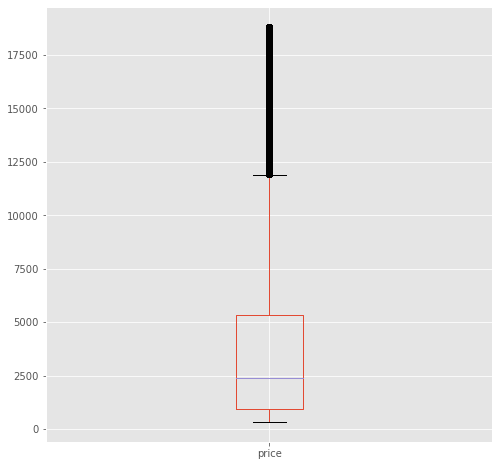

In [29]:
df[['price']].plot(kind='box', figsize=(8, 8))

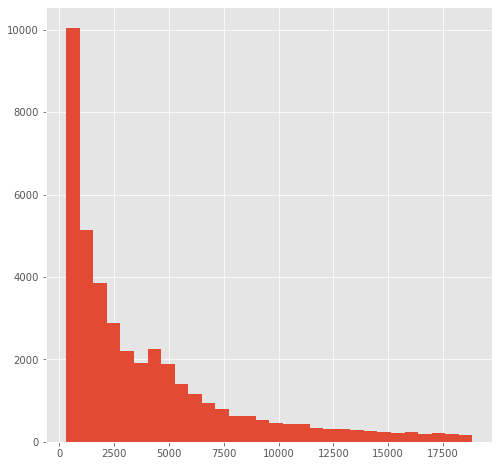

In [30]:
fig, ax =plt.subplots(figsize=(8,8))
ax.hist(df["price"], bins=30)

plt.show();

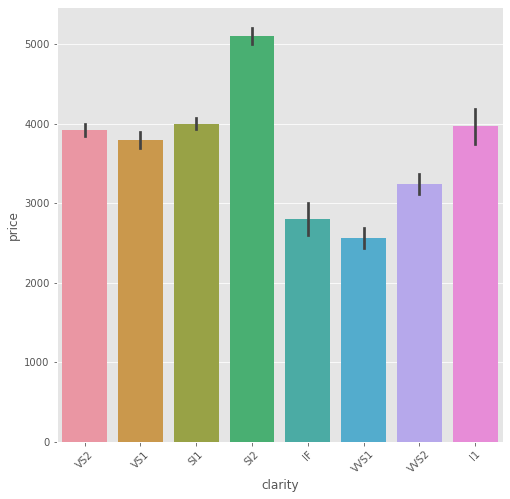

In [31]:
fig, ax= plt.subplots(figsize=(8,8))
sns.barplot(data=df, x="clarity", y="price")
plt.xticks(rotation=45);

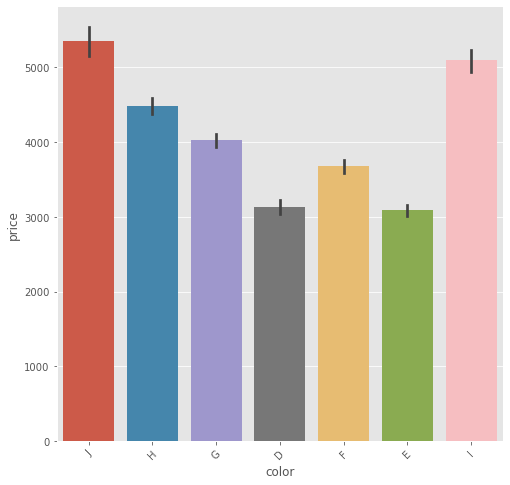

In [32]:
fig, ax= plt.subplots(figsize=(8,8))
sns.barplot(data=df, x="color", y="price")
plt.xticks(rotation=45);

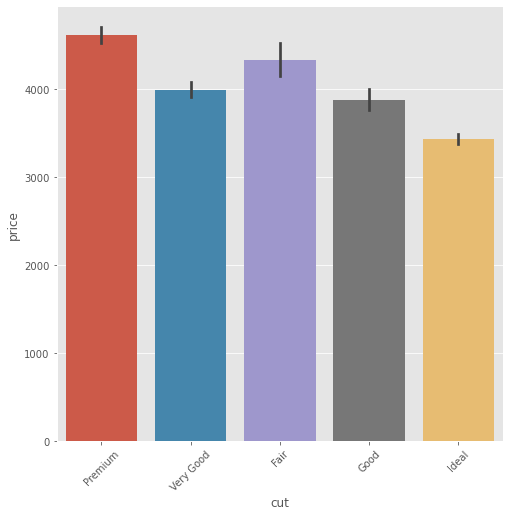

In [33]:
fig, ax= plt.subplots(figsize=(8,8))
sns.barplot(data=df, x="cut", y="price")
plt.xticks(rotation=45);

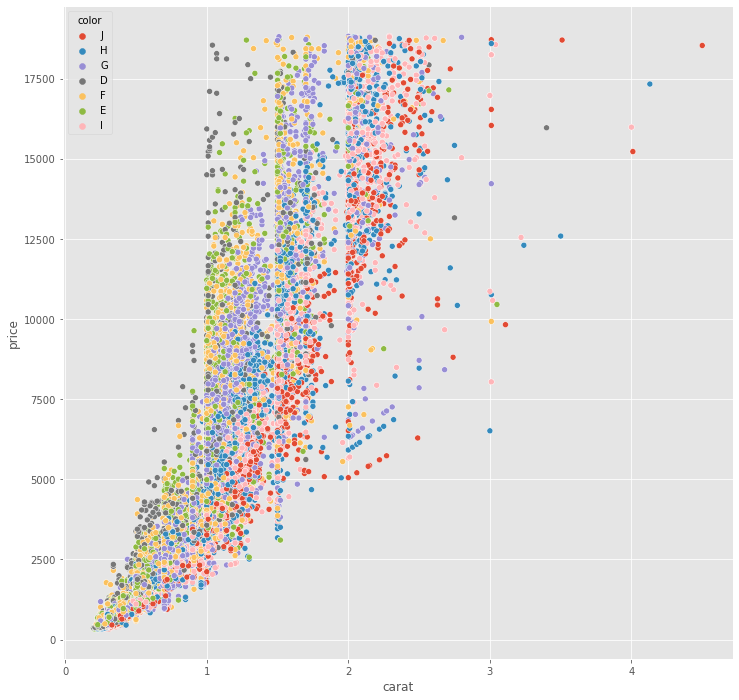

In [34]:
plt.figure(figsize = (12,12))
ax = sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'color')

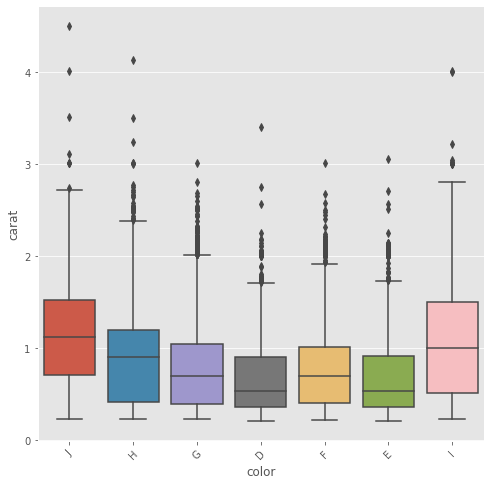

In [69]:
fig, ax= plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x="color", y="carat")
plt.xticks(rotation=45);

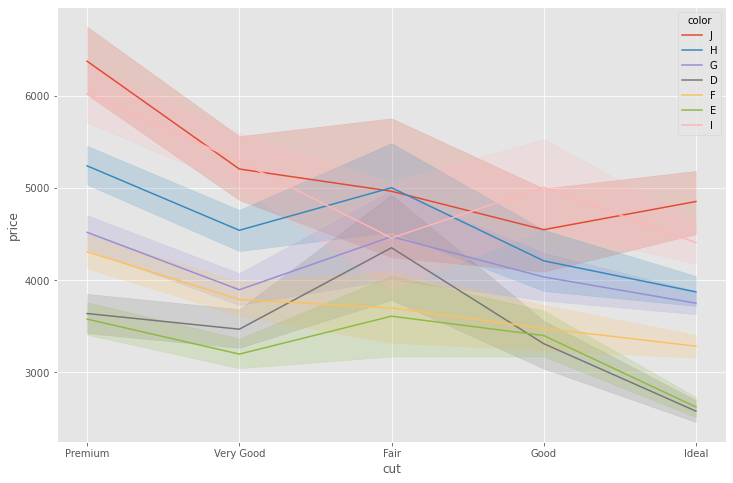

In [35]:
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x="cut", y="price", hue="color", data=df)

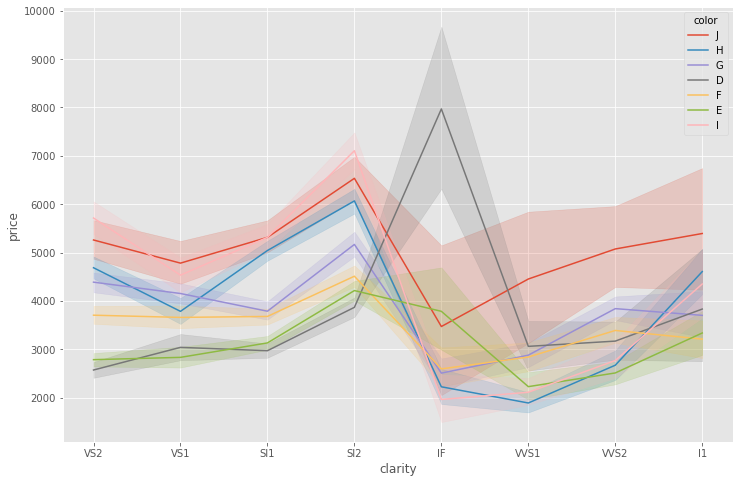

In [36]:
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x="clarity", y="price", hue="color", data=df)

### Bonus Challenge: Hypothesis Testing

#### Test 1 - one sample vs constant hypothesis test. We know from the available literature that diamonds average price rounds about 4000 USD. The aim is to test whether the prices in our sample are significantly different from the literature value. Give some conclusions about the implications of your test results.

In [37]:
from scipy.stats import ttest_1samp

In [38]:
muestra = df["price"].to_list()

In [39]:
ttest_1samp(muestra, 4000)

Ttest_1sampResult(statistic=-3.604902369125729, pvalue=0.00031264532833074845)

In [40]:
pvalue = 0.00031264532833074845
pvalue/2

0.00015632266416537423

In [41]:
pvalue/2 < 0.05

True

In [42]:
#we can reject the null hypothesis because p-value is less than or equal to the level of significance

#### Test 2 - two independent samples. Our sample includes diamonds with different features (carat, cut, color clarity, etc.). It seems clear that the carat plays an important role in price. However, it's not that clear whether the prices of some "sub-groups" are significantly different from each other. These are the "sub-groups" that you might feel suspicious about it:

In [43]:
from scipy.stats import ttest_ind

#### Sub-Test 1: Fair cut + color G vs. Fair cut + color I

In [44]:
sample_fair_g = df[(df["cut"]=="Fair")&(df["color"]=="G")]["price"].to_list()
sample_fair_i = df[(df["cut"]=="Fair")&(df["color"]=="I")]["price"].to_list()

In [45]:
ttest_ind (sample_fair_g, sample_fair_i)

Ttest_indResult(statistic=0.03552493926641288, pvalue=0.971680163699314)

In [46]:
pvalue=0.971680163699314
pvalue < 0.05

False

In [47]:
#we can't reject the null hypothesis, because p-value is greater than our significance level

#### Sub-Test 2: Good cut + color E vs. Good cut + color F

In [48]:
sample_good_e = df[(df["cut"]=="Good")&(df["color"]=="E")]["price"].to_list()
sample_good_f = df[(df["cut"]=="Good")&(df["color"]=="F")]["price"].to_list()

In [49]:
ttest_ind (sample_good_e, sample_good_f)

Ttest_indResult(statistic=-0.44021568469654665, pvalue=0.6598512677605672)

In [50]:
pvalue=0.6598512677605672
pvalue < 0.05

False

In [51]:
#we can't reject the null hypothesis, because p-value is greater than our significance level

#### Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E

In [52]:
sample_ideal_d = df[(df["cut"]=="Ideal")&(df["color"]=="D")]["price"].to_list()
sample_ideal_e = df[(df["cut"]=="Ideal")&(df["color"]=="E")]["price"].to_list()

In [53]:
ttest_ind (sample_ideal_d, sample_ideal_e)

Ttest_indResult(statistic=-0.5353150115731534, pvalue=0.5924555216763925)

In [54]:
pvalue=0.5924555216763925
pvalue < 0.05

False

In [55]:
#we can't reject the null hypothesis, because p-value is greater than our significance level

#### Sub-Test 4: Premium cut + color D vs. Premium cut + color E

In [56]:
sample_premium_d = df[(df["cut"]=="Premium")&(df["color"]=="D")]["price"].to_list()
sample_premium_e = df[(df["cut"]=="Premium")&(df["color"]=="E")]["price"].to_list()

In [57]:
ttest_ind (sample_premium_d, sample_premium_e)

Ttest_indResult(statistic=0.4218931206720332, pvalue=0.6731344334342131)

In [58]:
pvalue=0.6731344334342131
pvalue < 0.05

False

In [59]:
#we can't reject the null hypothesis, because p-value is greater than our significance level

#### Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J

In [60]:
sample_verygood_i = df[(df["cut"]=="Very Good")&(df["color"]=="I")]["price"].to_list()
sample_verygood_j = df[(df["cut"]=="Very Good")&(df["color"]=="J")]["price"].to_list()

In [61]:
ttest_ind (sample_verygood_i, sample_verygood_j)

Ttest_indResult(statistic=0.3375452090566639, pvalue=0.7357563230850955)

In [62]:
pvalue=0.7357563230850955
pvalue < 0.05

False

In [63]:
#we can't reject the null hypothesis, because p-value is greater than our significance level

#### Sub-Test 6: All cuts + color D vs. All cuts + color E

In [64]:
sample_allcut_d = df[["cut"]&(df["color"]=="D")]["price"].to_list()
sample_allcut_e = df[["cut"]&(df["color"]=="E")]["price"].to_list()

In [65]:
ttest_ind (sample_allcut_d, sample_allcut_e)

Ttest_indResult(statistic=0.7630611794666871, pvalue=0.44544145948793734)

In [66]:
pvalue = 0.44544145948793734
pvalue < 0.05

False

In [67]:
#we can't reject the null hypothesis, because p-value is greater than our significance level

### Hypothesis Testing extra analysis

#### We want to check if there is a correlation between the categorical values cut and color

#### 1) Contingency matrix for: Color H and Cut Premium

In [95]:
observed_values =np.array([[1771,4506],[8489,25689]])
observed_values

array([[ 1771,  4506],
       [ 8489, 25689]])

In [104]:
from scipy.stats import chi2_contingency

In [105]:
chi2_contingency(observed_values)

(31.760936901166325,
 1.743646095073229e-08,
 1,
 array([[ 1591.94215795,  4685.05784205],
        [ 8668.05784205, 25509.94215795]]))

In [116]:
pvalue = 1.743646095073229e-08
pvalue < 0.05

True

#### 2) Contingency matrix for: Color I and Cut Fair

In [112]:
observed_values =np.array([[141,1076],[3891,35347]])
observed_values

array([[  141,  1076],
       [ 3891, 35347]])

In [113]:
from scipy.stats import chi2_contingency

In [114]:
chi2_contingency(observed_values)

(3.482588163545031,
 0.062017671277212666,
 1,
 array([[  121.29388209,  1095.70611791],
        [ 3910.70611791, 35327.29388209]]))

In [115]:
pvalue = 0.062017671277212666
pvalue < 0.05

False

#### 3)  Contingency matrix for: Color J and Cut Premium

In [124]:
observed_values =np.array([[615,9645],[1525,28670]])
observed_values

array([[  615,  9645],
       [ 1525, 28670]])

In [125]:
from scipy.stats import chi2_contingency

In [126]:
chi2_contingency(observed_values)

(13.423333181424754,
 0.0002485137343230812,
 1,
 array([[  542.73637375,  9717.26362625],
        [ 1597.26362625, 28597.73637375]]))

In [127]:
pvalue = 0.0002485137343230812
pvalue < 0.05

True

#### 4) Contingency matrix for: Color H and Clarity SI2

In [135]:
observed_values =np.array([[1160,5769],[5117,28409]])
observed_values

array([[ 1160,  5769],
       [ 5117, 28409]])

In [136]:
from scipy.stats import chi2_contingency

In [137]:
chi2_contingency(observed_values)

(9.462569762683284,
 0.0020970707965471385,
 1,
 array([[ 1075.10401681,  5853.89598319],
        [ 5201.89598319, 28324.10401681]]))

In [138]:
pvalue =0.0020970707965471385
pvalue < 0.05

True